# Task 1: Introduction

In [8]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Task 2: Dataset

Real estate agent table:

|Area|Distance|Price|
|---|---|---|
|70|3|21200|
|50|1|22010|
|120|9|24305|
|100|2|31500|

You can write the relationship with a 2-variable linear equation:

$
\begin{equation}
y = b + w_1.x_1 + w_2.x_2
\end{equation}
$

In a vector form:

$
\begin{equation}
y = b + (w_1 w_2).\binom{x_1}{x_2}
\end{equation}
$

Where
$
\begin{equation}
W = (w_1 w_2)
\end{equation}
$
and
$
\begin{equation}
X = \binom{x_1}{x_2}
\end{equation}
$

In [9]:
w = [1, -3]
print(w)
w = np.reshape(w,(2,1))
print(w)

[1, -3]
[[ 1]
 [-3]]


In [15]:
def generate_example(num=100):
    w = [1, -3]
    b = 1
    w = np.reshape(w,(2,1))
    X = np.random.rand(num,2)
    y = b + np.dot(X,w) + np.random.rand()
    y = np.reshape(y ,(num,1))
    return X , y

In [26]:
X, y = generate_example(1000)
print(X.shape)
print(y.shape)
print(X[0,:])

(1000, 2)
(1000, 1)
[0.41175211 0.19531265]


# Task 3: Initialize Parameters

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

The objective of the gradient descent algorithm is to minimize this loss value.

Gradient Descent Objective is to 
$
\begin{equation}
min(J)
\end{equation}
$

In [13]:
class Model():
    def __init__(self, num_features):
        self.num_features = num_features
        self.W            = np.random.randn(num_features, 1)
        self.b            = np.random.randn()

In [14]:
model = Model(4)
print(model.W)
print(model.b)


[[ 0.86102508]
 [-0.44856993]
 [ 1.96785144]
 [ 0.42932226]]
-1.3982422353134278


# Task 4: Forward Pass

The gradient descent algorithm can be simplified in 4 steps:

1. Get predictions y_hat for X with current values of W and b.
2. Compute the loss between y and y_hat
3. Find gradients of the loss with respect to parameters W and b
4. Update the values of W and b by subtracting the gradient values obtained in the previous step

Let's simplify our linear equation a bit more for an example:
$
\begin{equation}
y = wx
\end{equation}
$

Let's plot J as a function of w

![Loss vs Param](JvsW.png)

The gradients of loss with respect to w:

\begin{equation}
\frac{dJ}{dw} = \frac{\delta{J}}{\delta{w}} = \lim_{\epsilon \to 0} \frac{J(w + \epsilon) - J(w)}{\epsilon}
\end{equation}

In [22]:
class Model(Model):
    def forward_pass(self, X):
        y = self.b + np.dot(X, self.W)
        return y

In [24]:
y_hat = Model(2).forward_pass(X)
print(y_hat.shape)

(1000, 1)


# Task 5: Compute Loss

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

In [27]:
class Model(Model):
    def compute_loss(self,y,y_true):
        loss = np.sum(np.square(y - y_true))
        return loss / ( 2 * y.shape[0])

In [28]:
model = Model(2)
y_hat = model.forward_pass(X)
loss  = model.compute_loss(y_hat, y)
print(loss)

0.9305092693858359


# Task 6: Backward Pass

The gradient of loss with respect to bias can be calculated with:

$
\begin{equation}
\frac{dJ}{db} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)})
\end{equation}
$

$
\begin{equation}
\frac{dJ}{dW_j} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)}).x_j^{(i)}
\end{equation}
$

In [36]:
class Model(Model):
    def backward_pass(self, X, y_true, y_hat):
        m  =  y_hat.shape[0]
        db = np.sum(y_hat - y_true) / m
        dW = np.sum( np.dot( (y_hat - y_true).T , X ), axis = 0) / m
        return dW, db

In [37]:
model = Model(2)
print(model.__dict__)
X, y  = generate_example(500)
y_hat = model.forward_pass(X)
dW,db = model.backward_pass(X,y_hat,y)
print(dW,db)

{'num_features': 2, 'W': array([[-1.20421535],
       [ 0.87820973]]), 'b': 0.9938920062808386}
[ 0.16330555 -0.30638947] -0.003118920626458259


# Task 7: Update Parameters

In [38]:
class Model(Model):
    def update_params(self, dW, db, lr):
        self.W -= lr * np.reshape(dW, (self.num_features, 1))
        self.b -= lr * db

# Task 8: Training Loop

In [41]:
class Model(Model):
    def train(self, x_train, y_train, iterations, lr):
        losses = []
        for epoch in range(iterations):
            y_hat  = self.forward_pass(x_train)
            dW, db = self.backward_pass(x_train,y_train,y_hat)
            self.update_params(dW,db,lr)
            loss = self.compute_loss(y_hat,y_train)
            losses.append(loss)
            if epoch % int(iterations/10) == 0:
                print(f"epoch : {epoch} Loss : {loss:.4f}")
        return losses

In [48]:
model = Model(2)

In [49]:
X, y = generate_example(1000)

In [50]:
perdidas = model.train(X,y,2000,0.01)

epoch : 0 Loss : 3.0617
epoch : 200 Loss : 0.3826
epoch : 400 Loss : 0.2721
epoch : 600 Loss : 0.1966
epoch : 800 Loss : 0.1422
epoch : 1000 Loss : 0.1030
epoch : 1200 Loss : 0.0748
epoch : 1400 Loss : 0.0544
epoch : 1600 Loss : 0.0396
epoch : 1800 Loss : 0.0289


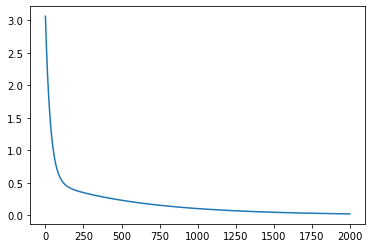

In [51]:
plt.plot(perdidas)

# Task 9: Predictions

In [52]:
model_vago = Model(2)
x_test , y_test = generate_example(500)

In [53]:
pred_sin = model_vago.forward_pass(x_test)

In [54]:
pred_fit = model.forward_pass(x_test)

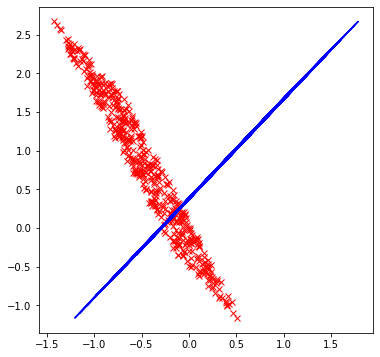

In [61]:
plt.figure(figsize=(6,6))
plt.plot(pred_sin,y_test,"rx")
plt.plot(pred_fit,y_test,"b")
plt.show()
           